In [1]:
import os
import numpy as np
import scipy
from collections import Counter
import sys
from IPython.display import SVG
import time
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools
import matplotlib as ml

In [2]:
%matplotlib inline
font = {'family' : 'Sans', 'weight' : 'normal','size': 16}
ml.rc('font', **font)
ml.rcParams['figure.figsize'] = (5.0, 5.0)
ml.rcParams['text.usetex'] =False
ml.rc('font', family='serif',size=12)

# PCA


In [25]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis.historical.eigenvec", delimiter=' ', header=None)

# Display the DataFrame
df=df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
# Update the ID column
#df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df

,FullID,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,ID,popID
0,GAST_7_1965_GAST_7_1965,-0.076568,-0.049429,-0.037776,-0.071212,0.140711,-0.257551,0.053043,0.227008,-0.104466,GAST_7_1965,GAST
1,KALM_2_1955_KALM_2_1955,-0.032070,0.011742,-0.053602,0.108455,-0.060299,0.021081,0.019708,0.013952,-0.043981,KALM_2_1955,KALM
2,GAST_10_1965_GAST_10_1965,-0.052269,0.023025,-0.018199,-0.036101,0.349492,-0.052437,0.569462,-0.299808,0.504647,GAST_10_1965,GAST
3,GAST_8_1965_GAST_8_1965,-0.077998,0.023599,0.101821,-0.677222,-0.570747,0.018692,0.210924,0.234400,0.158962,GAST_8_1965,GAST
4,KALM_5_1961_KALM_5_1961,-0.036677,0.011519,-0.058748,0.136051,-0.022237,-0.024968,0.026921,0.023759,-0.071439,KALM_5_1961,KALM
5,ITAL_1_1946_ITAL_1_1946,0.791287,-0.566623,-0.084931,-0.060082,-0.016225,-0.032828,-0.002444,-0.010911,0.020242,ITAL_1_1946,ITAL
6,GAST_11_1965_GAST_11_1965,-0.040547,0.001457,-0.054425,0.111565,-0.023724,0.010717,-0.033073,0.031640,-0.004550,GAST_11_1965,GAST
7,UPPS_3_1969_UPPS_3_1969,-0.039020,0.008526,-0.059028,0.090803,-0.076344,0.029525,0.050102,0.043708,-0.068638,UPPS_3_1969,UPPS
8,GAST_1_1941_GAST_1_1941,-0.056492,-0.021607,-0.056299,-0.047870,0.005242,0.079642,-0.119471,0.000352,0.063159,GAST_1_1941,GAST
9,UPPS_2_1958_UPPS_2_1958,-0.041084,-0.006334,-0.074577,0.140883,-0.052179,0.040729,0.057690,0.051924,-0.024270,UPPS_2_1958,UPPS


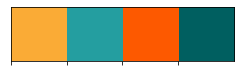

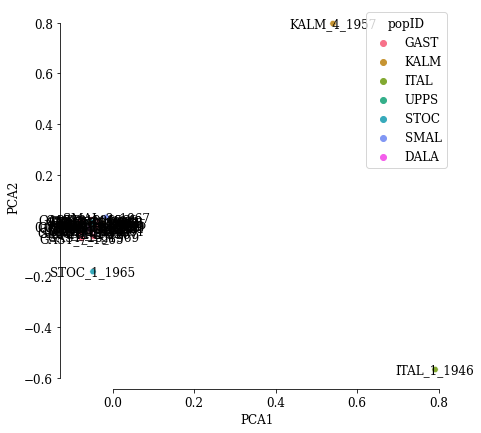

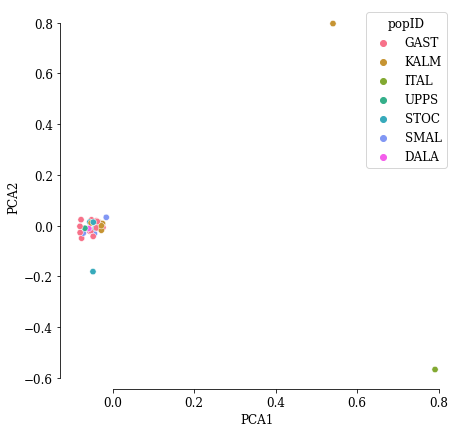

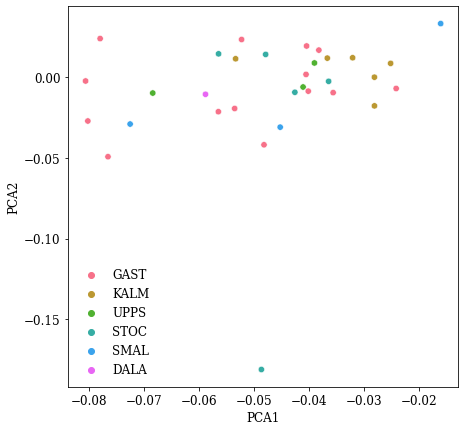

In [49]:
#print(df['loc'])
#eigval = open("/Users/dshipilina/GitHub/AfricanDivide/PCA/vanessa.fullSFS.eigenval").read()
#split_eigval = eigval.split('\n')
#print(split_eigval[2])


flatui = ["#faab36", "#249ea0", "#fd5900", "#005f60"]
sns.set_palette(flatui)
sns.palplot(sns.color_palette())
plt.show()

#ax = sns.violinplot(x="Contents", y="Flavour", data=rd, color="lol", inner="box")

#df["alpha"] = np.where(df['popID']=="NHE", 1.0, 0.05)
#df

#sns.scatterplot(x=df['PCA1'], y=df['PCA2'],hue=df['popID'],
                    # data=df[df["alpha"] == 0.05], alpha=0.4)
#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'],data=df[df["alpha"] == 1.0], alpha=1.0)

#plt.show()
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine(offset=2, trim=True)
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
#plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.png",bbox_inches="tight")
for i in range(len(df)):
    plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center')

# Adjust plot aesthetics
sns.despine(offset=2, trim=True)
plt.rcParams['figure.figsize'] = (7.0, 7.0)

# Show the plot
plt.show()

sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine(offset=2, trim=True)
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
#plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.png",bbox_inches="tight")
#for i in range(len(df)):
#    plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center')

# Adjust plot aesthetics
#sns.despine(offset=2, trim=True)
plt.rcParams['figure.figsize'] = (7.0, 7.0)

# Show the plot
plt.show()


filtered_df = df.drop([5, 24])

# Plot the scatter plot
sns.scatterplot(x=filtered_df['PCA1'], y=filtered_df['PCA2'], hue=filtered_df['popID'], s=40)

# Add labels to each dot
#for i in range(len(filtered_df)):
#    plt.text(filtered_df['PCA1'].iloc[i], filtered_df['PCA2'].iloc[i], filtered_df['ID'].iloc[i], ha='center', va='center')

# Adjust plot aesthetics
#sns.despine(offset=2, trim=True)
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.legend(frameon=False)

plt.rcParams['figure.figsize'] = (7.0, 7.0)

# Show the plot
plt.show()
##df["alpha"] = np.where(df['popID']=="NHE", 0, 1)
##data=df[df["alpha"] == 1]
##sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['popID'])
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.png",bbox_inches="tight")
##plt.show()

#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'],data=df[df["alpha"] == 1.0], alpha=1.0)
#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
#sns.despine(offset=2, trim=True)
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
#ml.rcParams['figure.figsize'] = (7.0, 7.0)
#plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.png",bbox_inches="tight")
#plt.show()





#df

#plt.plot(df['PCA1'], df['PCA2'],'o')#,palette="dark")
#sns.barplot(x=chroname, y=repcov) #, palette="deep") #, ax=ax3)
#plt.xticks(rotation=90)
#plt.axis('off')
#plt.xticks([0,100,200,300],[])
#plt.xticks([0,100,200,300],["0","100","200","300"])
#xtic=np.linspace(-0.075,0.015, num=4)
#plt.xticks(xtic,[])
#plt.xaxis.set_major_locator(plt.MaxNLocator(3))
#plt.axis('equal')
#plt.yticks([0,100,200,300],[])
#plt.yticks()
#plt.xaxis.set_tick_params(width=3)

#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_rare_noLD_4pops_outlremoved.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_rare_noLD_4pops_outlremoved.png",bbox_inches="tight")
#plt.show()
#print(np.linspace(-0.075,0.015, num=4))

In [43]:
filtered_df = df.drop([5, 24])
filtered_df

,FullID,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,ID,popID
0,GAST_7_1965_GAST_7_1965,-0.076568,-0.049429,-0.037776,-0.071212,0.140711,-0.257551,0.053043,0.227008,-0.104466,GAST_7_1965,GAST
1,KALM_2_1955_KALM_2_1955,-0.032070,0.011742,-0.053602,0.108455,-0.060299,0.021081,0.019708,0.013952,-0.043981,KALM_2_1955,KALM
2,GAST_10_1965_GAST_10_1965,-0.052269,0.023025,-0.018199,-0.036101,0.349492,-0.052437,0.569462,-0.299808,0.504647,GAST_10_1965,GAST
3,GAST_8_1965_GAST_8_1965,-0.077998,0.023599,0.101821,-0.677222,-0.570747,0.018692,0.210924,0.234400,0.158962,GAST_8_1965,GAST
4,KALM_5_1961_KALM_5_1961,-0.036677,0.011519,-0.058748,0.136051,-0.022237,-0.024968,0.026921,0.023759,-0.071439,KALM_5_1961,KALM
6,GAST_11_1965_GAST_11_1965,-0.040547,0.001457,-0.054425,0.111565,-0.023724,0.010717,-0.033073,0.031640,-0.004550,GAST_11_1965,GAST
7,UPPS_3_1969_UPPS_3_1969,-0.039020,0.008526,-0.059028,0.090803,-0.076344,0.029525,0.050102,0.043708,-0.068638,UPPS_3_1969,UPPS
8,GAST_1_1941_GAST_1_1941,-0.056492,-0.021607,-0.056299,-0.047870,0.005242,0.079642,-0.119471,0.000352,0.063159,GAST_1_1941,GAST
9,UPPS_2_1958_UPPS_2_1958,-0.041084,-0.006334,-0.074577,0.140883,-0.052179,0.040729,0.057690,0.051924,-0.024270,UPPS_2_1958,UPPS
10,STOC_4_1965_STOC_4_1965,-0.036436,-0.002821,-0.048249,0.029452,-0.008278,-0.071909,-0.000307,-0.039515,0.009504,STOC_4_1965,STOC


In [59]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis.all.eigenvec", delimiter=' ', header=None)

# Display the DataFrame
df=df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
# Update the ID column
#df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))
df["year"] = df.iloc[:, 0].apply(lambda x: ''.join(x.split('_')[2]))
df

df.to_csv('/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis.all.meta.csv', index=False)

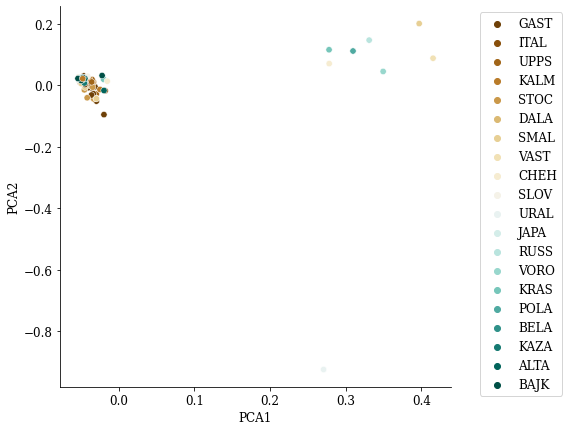

In [92]:
# Plot scatterplot with the custom palette
#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40, palette=palette)
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40,palette="BrBG") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
#sns.despine(offset=2, trim=True)
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")
#for i in range(len(df)):
#    plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=8)

# Adjust plot aesthetics
sns.despine()
plt.rcParams['figure.figsize'] = (7.0, 7.0)

# Show the plot
plt.show()

#plt.scatter(df['PCA1'], df['PCA2'], c=df['popID'], s=40, cmap='magma')

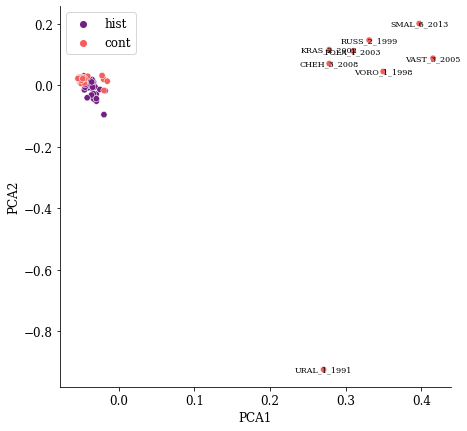

In [70]:
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['time'], s=40,palette="magma") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.legend(frameon=True)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.png",bbox_inches="tight")
for i in range(len(df)):
    if df['PCA1'][i] > 0.2:
        plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=8)


# Adjust plot aesthetics
sns.despine() #(offset=2, trim=True) #plt.rcParams['figure.figsize'] = (7.0, 7.0)

# Show the plot
plt.show()

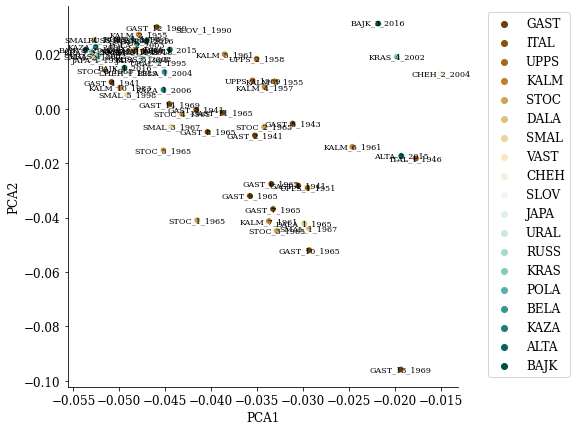

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered_df = df[df['PCA1'] < 0.2]

sns.scatterplot(x=filtered_df['PCA1'], y=filtered_df['PCA2'], hue=filtered_df['popID'], s=40, palette="BrBG")
sns.despine()
#plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
for i in range(len(df)):
    if df['PCA1'][i] < 0.2:
        plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=8)
#plt.legend(frameon=True)
plt.show()



## Contemporary only

In [3]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis.contemp.PCA.eigenvec", delimiter=' ', header=None)

# Display the DataFrame
df=df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
# Update the ID column
#df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df

,FullID,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,ID,popID
0,SMAL_4_1996_SMAL_4_1996,-0.085182,-0.006093,-0.001303,0.010554,-0.001963,-0.003571,0.005044,-0.005262,0.028512,SMAL_4_1996,SMAL
1,KAZA_1_2006_KAZA_1_2006,-0.075742,-0.008960,-0.002688,0.013381,-0.001407,-0.000051,-0.000992,-0.005715,0.064680,KAZA_1_2006,KAZA
2,POLA_2_2003_POLA_2_2003,-0.083855,-0.006312,-0.001895,0.010599,-0.001034,-0.001805,0.005543,-0.003511,0.033334,POLA_2_2003,POLA
3,KRAS_4_2002_KRAS_4_2002,-0.073198,-0.002247,-0.000557,0.007588,-0.004807,-0.002151,-0.000450,-0.003951,0.016120,KRAS_4_2002,KRAS
4,RUSS_3_1999_RUSS_3_1999,-0.085457,-0.004465,-0.002245,0.008148,-0.003112,-0.002966,0.004992,-0.002380,0.033284,RUSS_3_1999,RUSS
5,KALM_9_1981_KALM_9_1981,-0.082904,-0.007120,-0.002398,0.011128,-0.003656,-0.000620,0.004600,-0.002340,0.034106,KALM_9_1981,KALM
6,RUSS_4_2008_RUSS_4_2008,-0.082286,-0.005134,-0.001633,0.009124,-0.002692,0.000656,0.005238,-0.005533,0.032854,RUSS_4_2008,RUSS
7,RUSS_1_1998_RUSS_1_1998,-0.083040,-0.005794,-0.000699,0.010417,-0.001466,-0.003350,0.005376,-0.002253,0.029518,RUSS_1_1998,RUSS
8,BELA_1_2004_BELA_1_2004,-0.082426,-0.006182,-0.003314,0.008503,-0.002042,0.001940,0.002845,-0.001445,0.026943,BELA_1_2004,BELA
9,RUSS_5_2008_RUSS_5_2008,-0.079035,-0.007095,-0.005329,0.011129,-0.001969,-0.000770,0.006558,-0.006750,0.042381,RUSS_5_2008,RUSS


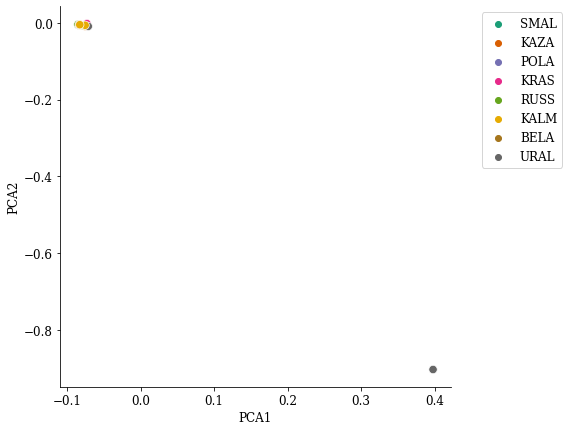

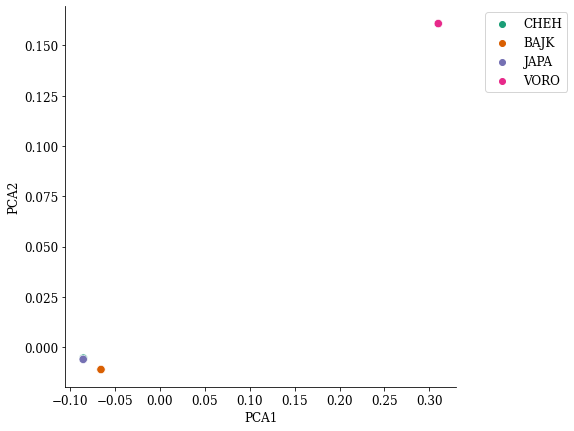

In [18]:
# Plot scatterplot with the custom palette
#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40, palette=palette)
sns.scatterplot(x=df['PCA1'][0:15], y=df['PCA2'][0:15], hue=df['popID'][0:15], s=70,palette="Dark2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
#sns.despine(offset=2, trim=True)
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")
#for i in range(len(df)):
#       plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=10)

# Adjust plot aesthetics
sns.despine()
#plt.rcParams['figure.figsize'] = (7.0, 7.0)

# Show the plot
plt.show()

#plt.scatter(df['PCA1'], df['PCA2'], c=df['popID'], s=40, cmap='magma')

# Plot scatterplot with the custom palette
#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40, palette=palette)
sns.scatterplot(x=df['PCA1'][16:20], y=df['PCA2'][16:20], hue=df['popID'][16:20], s=70,palette="Dark2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
#sns.despine(offset=2, trim=True)
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")
#for i in range(len(df)):
#       plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=10)

# Adjust plot aesthetics
sns.despine()
#plt.rcParams['figure.figsize'] = (7.0, 7.0)

# Show the plot
plt.show()

In [63]:
df = pd.read_csv("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis.all.meta.csv", delimiter=',')
df

,FullID,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,ID,popID,year,time,country
0,GAST_1_1941_GAST_1_1941,-0.030509,-0.028270,-0.247731,-0.012805,0.008864,0.004697,0.097096,0.090557,-0.092995,GAST_1_1941,GAST,1941,hist,swe
1,GAST_2_1941_GAST_2_1941,-0.035225,-0.009817,-0.098259,0.010800,-0.003453,-0.040524,0.057942,0.064749,0.042074,GAST_2_1941,GAST,1941,hist,swe
2,GAST_3_1941_GAST_3_1941,-0.041621,-0.000322,0.012224,-0.003925,0.002202,0.014635,0.002924,-0.020733,-0.016675,GAST_3_1941,GAST,1941,hist,swe
3,GAST_4_1941_GAST_4_1941,-0.050848,0.009795,0.019103,0.010203,0.016096,0.024237,0.008468,0.001704,-0.007174,GAST_4_1941,GAST,1941,hist,swe
4,GAST_5_1943_GAST_5_1943,-0.031113,-0.005485,-0.042047,0.025239,-0.009523,-0.002522,0.027949,-0.028462,-0.063397,GAST_5_1943,GAST,1943,hist,swe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,BAJK_3_2016_BAJK_3_2016,-0.021797,0.031261,0.076869,0.016044,0.016390,0.037616,-0.025416,-0.001160,0.012147,BAJK_3_2016,BAJK,2016,cont,abr
69,BAJK_1_2016_BAJK_1_2016,-0.049447,0.015015,0.054413,-0.001879,-0.010808,0.026160,-0.017030,-0.013659,-0.017223,BAJK_1_2016,BAJK,2016,cont,abr
70,BAJK_2_2016_BAJK_2_2016,-0.053682,0.021675,0.074194,0.008524,-0.005016,-0.001045,-0.019263,-0.007041,-0.021761,BAJK_2_2016,BAJK,2016,cont,abr
71,BAJK_4_2016_BAJK_4_2016,-0.047027,0.024907,0.059125,-0.008148,0.022251,-0.007465,-0.012454,-0.033137,-0.001397,BAJK_4_2016,BAJK,2016,cont,abr


In [47]:
palette = sns.color_palette("hsv", 73)
palette

[(1.0, 0.06948536360301065, 0.0),
 (1.0, 0.1389707272060213, 0.0),
 (1.0, 0.2316178786767022, 0.0),
 (1.0, 0.3011032422797128, 0.0),
 (1.0, 0.3937503937503937, 0.0),
 (1.0, 0.4632357573534044, 0.0),
 (1.0, 0.5558829088240852, 0.0),
 (1.0, 0.6253682724270958, 0.0),
 (1.0, 0.7180154238977768, 0.0),
 (1.0, 0.7875007875007874, 0.0),
 (1.0, 0.8801479389714684, 0.0),
 (0.9959555658085071, 0.9455888683829858, 0.0),
 (0.9727937779408368, 0.9919124441183264, 0.0),
 (0.8882341823518295, 1.0, 0.0),
 (0.8187488187488188, 1.0, 0.0),
 (0.726101667278138, 1.0, 0.0),
 (0.6566163036751272, 1.0, 0.0),
 (0.5639691522044463, 1.0, 0.0),
 (0.4944837886014357, 1.0, 0.0),
 (0.4018366371307548, 1.0, 0.0),
 (0.3323512735277442, 1.0, 0.0),
 (0.23970412205706326, 1.0, 0.0),
 (0.17021875845405265, 1.0, 0.0),
 (0.07757160698337173, 1.0, 0.0),
 (0.0235287477934537, 1.0, 0.015442504413092598),
 (0.0003669599257835228, 1.0, 0.061766080148432954),
 (0.0, 1.0, 0.15404569495487538),
 (0.0, 1.0, 0.22353062080241548),
 (0.0, 1.0, 0.3161771885991356),
 (0.0, 1.0, 0.3856621144466757),
 (0.0, 1.0, 0.47830868224339584),
 (0.0, 1.0, 0.547793608090936),
 (0.0, 1.0, 0.6404401758876557),
 (0.0, 1.0, 0.7099251017351961),
 (0.0, 1.0, 0.8025716695319163),
 (0.0, 1.0, 0.8720565953794563),
 (0.0, 1.0, 0.9647031631761764),
 (0.0, 0.9658116955911072, 1.0),
 (0.0, 0.8963263319880966, 1.0),
 (0.0, 0.8036791805174157, 1.0),
 (0.0, 0.7341938169144051, 1.0),
 (0.0, 0.6415466654437243, 1.0),
 (0.0, 0.5720613018407144, 1.0),
 (0.0, 0.4794141503700329, 1.0),
 (0.0, 0.40992878676702216, 1.0),
 (0.0, 0.31728163529634135, 1.0),
 (0.0, 0.24779627169333063, 1.0),
 (0.0, 0.15514912022264993, 1.0),
 (0.0, 0.08566375661963932, 1.0),
 (0.015440535661123769, 0.03161892867775246, 1.0),
 (0.07646875845405214, 0.0, 1.0),
 (0.14595412205706287, 0.0, 1.0),
 (0.23860127352774382, 0.0, 1.0),
 (0.30808663713075457, 0.0, 1.0),
 (0.40073378860143555, 0.0, 1.0),
 (0.47021915220444627, 0.0, 1.0),
 (0.5628663036751272, 0.0, 1.0),
 (0.632351667278138, 0.0, 1.0),
 (0.724998818748819, 0.0, 1.0),
 (0.7944841823518297, 0.0, 1.0),
 (0.8871313338225106, 0.0, 1.0),
 (0.9566166974255214, 0.0, 1.0),
 (0.9878673536761773, 0.0, 0.9617652926476454),
 (1.0, 0.0, 0.8812507875007872),
 (1.0, 0.0, 0.8117654238977766),
 (1.0, 0.0, 0.7191182724270964),
 (1.0, 0.0, 0.6496329088240851),
 (1.0, 0.0, 0.5569857573534043),
 (1.0, 0.0, 0.4875003937503936),
 (1.0, 0.0, 0.39485324227971275),
 (1.0, 0.0, 0.32536787867670214),
 (1.0, 0.0, 0.23272072720602122),
 (1.0, 0.0, 0.16323536360301072)]

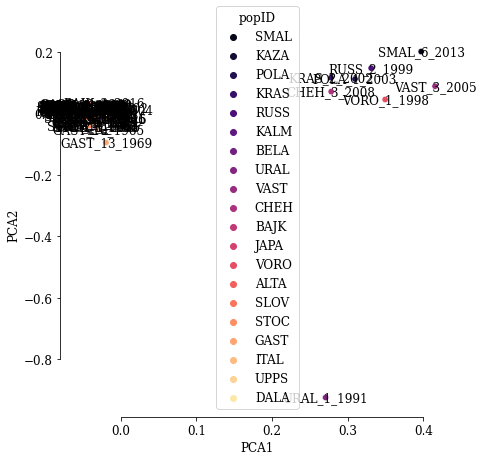

No handles with labels found to put in legend.


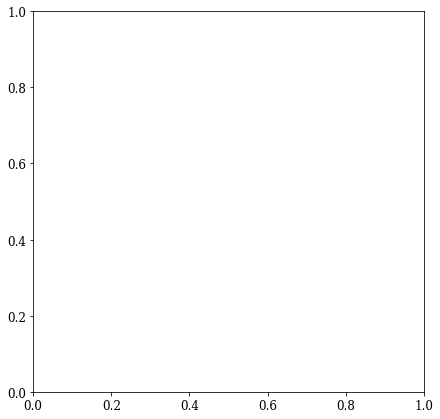

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot scatterplot
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40, palette="magma")
sns.despine(offset=2, trim=True)
#plt.xlabel("PCA 1 (" + split_eigval[0] + "%)")
#plt.ylabel("PCA 2 (" + split_eigval[1] + "%)")

# Add text labels
for i in range(len(df)):
    plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center')

# Adjust plot aesthetics
plt.rcParams['figure.figsize'] = (7.0, 7.0)

# Save the scatterplot
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf", bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.png", bbox_inches="tight")
plt.show()

# Create a separate legend plot
legend = plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/legend.pdf", bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/legend.png", bbox_inches="tight")

# Show the scatterplot
plt.show()

In [98]:
eigvec = open("/Users/dshipilina/GitHub/AfricanDivide/PCA/vanessa.fullSFS.eigenvec").read()
split_eig = eigvec.split('\n')
eigvec_array=[]
#print(split_file2[2])
for i in split_eig:
    ii=i.split()
    eigvec_array+=[ii]
    
#print(eigvec_array[2])
    
popid = open("/Users/dshipilina/GitHub/AfricanDivide/popmap1.txt").read()
split_popid = popid.split('\n')
#print(txt2)
popID_array=[]
#print(split_file2[2])
for i in split_popid:
    ii=i.split()
    popID_array+=[ii]

df = pd.DataFrame(eigvec_array) # , columns = ["ScaffoldID", "N_BUSCOs","BUSCOs_coverage", ])
#remove extra labels and extra PCs
df =df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
#remove empty row
df = df.drop(labels=[347], axis=0)
#rename columns
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
cols = ["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
#df["PCA1"] = pd.to_numeric(df["PCA1"], downcast="float")
#df["PCA2"] = pd.to_numeric(df["PCA2"], downcast="float")
#df["PCA3"] = pd.to_numeric(df["PCA3"], downcast="float")

#splitting names
#print(df["FullID"])
dftmp=df["FullID"].str.split('_',expand=True)
#print(dftmp)
dftmp.columns=["Location", "SampleID"]
dftmp

#getting population IDs
dftmp2 = pd.DataFrame(popID_array)
dftmp2.columns=["pop","popID"]
dftmp2

#combining table
df = pd.concat([dftmp,dftmp2,df],axis=1)
df = df.drop(labels=[347], axis=0)
df

,Location,SampleID,pop,popID,FullID,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,Ethiopia,14L679,Ethiopia_14L679,SHEA,Ethiopia_14L679,0.000097,-0.008168,-0.008632,0.000123,0.030216,0.014718,0.002400,-0.016154,-0.036828
1,Ethiopia,14L834,Ethiopia_14L834,SHEA,Ethiopia_14L834,-0.002885,-0.003945,0.029606,-0.036448,-0.085937,-0.214022,0.191938,-0.058535,-0.013052
2,Ethiopia,14L847,Ethiopia_14L847,SHEA,Ethiopia_14L847,0.003818,-0.034181,-0.000400,0.001945,0.005760,-0.034160,0.012775,0.050932,0.008138
3,Ethiopia,14L879,Ethiopia_14L879,SHEA,Ethiopia_14L879,0.005725,-0.042547,-0.019146,0.046944,-0.014321,0.004577,0.015292,0.040597,0.071073
4,Ethiopia,14L880,Ethiopia_14L880,SHEA,Ethiopia_14L880,0.010086,-0.003025,-0.013545,0.055810,0.016690,-0.061142,0.078322,0.033540,0.018149
5,Ethiopia,14L881,Ethiopia_14L881,SHEA,Ethiopia_14L881,0.016871,-0.029300,0.000522,0.030783,-0.006152,0.023856,-0.105348,0.039966,-0.020748
6,Ethiopia,14L882,Ethiopia_14L882,SHEA,Ethiopia_14L882,0.020229,-0.016730,-0.000635,0.022065,0.020973,-0.029956,0.060427,-0.030374,0.029982
7,Ethiopia,14L883,Ethiopia_14L883,SHEA,Ethiopia_14L883,0.012222,-0.047360,0.011949,0.060658,0.010854,0.007260,-0.003843,0.002074,-0.021084
8,Ethiopia,14L884,Ethiopia_14L884,SHEA,Ethiopia_14L884,0.010571,-0.023526,-0.010847,0.054778,0.103059,-0.070647,-0.084763,0.022748,0.060486
9,Ethiopia,14L885,Ethiopia_14L885,SHEA,Ethiopia_14L885,0.011358,0.002832,-0.019333,0.034256,-0.036370,0.004291,-0.055821,-0.006273,-0.059392


In [2]:
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine(offset=2, trim=True)
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
#plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.png",bbox_inches="tight")
for i in range(len(df)):
    plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center')

# Adjust plot aesthetics
sns.despine(offset=2, trim=True)
plt.rcParams['figure.figsize'] = (7.0, 7.0)

# Show the plot
plt.show()

NameError: name 'sns' is not defined

In [11]:
new = open("/Users/dshipilina/GitHub/AfricanDivide/ChromLR24.repeat.out").read()
split_ = new.split('\n')
print(split_[2])
eigve_array=[]
#print(split_file2[2])
for i in split_:
    ii=i.split()
    eigve_array+=[ii]

df3=pd.DataFrame(eigve_array)
df3.columns=['chrom','begin','end','repts']
df3 = df3.drop(labels=[171], axis=0)
df3["begin"] = pd.to_numeric(df3["begin"], downcast="float")
df3["repts"] = pd.to_numeric(df3["repts"], downcast="float")
df3

#df4= pd.concat([df3,df],axis=1)
#print(df4)
#df4["pop2"] = pd.to_numeric(df4["pop2"], downcast="float")
#df4["pop1"] = pd.to_numeric(df4["pop1"], downcast="float")
#df4.sort_values(by=["pop2"], inplace=True)
#df4 = df4.sort_values(["popID", "pop1","Location"], ascending = (False, True,True))
#print(df)
#df4 = df4.drop(labels=[347], axis=0)
#df4[100:150]

LR999924.1	200001	300000	66


,chrom,begin,end,repts
0,LR999924.1,1.0,100000,181.0
1,LR999924.1,100001.0,200000,129.0
2,LR999924.1,200001.0,300000,66.0
3,LR999924.1,300001.0,400000,58.0
4,LR999924.1,400001.0,500000,80.0
5,LR999924.1,500001.0,600000,83.0
6,LR999924.1,600001.0,700000,126.0
7,LR999924.1,700001.0,800000,109.0
8,LR999924.1,800001.0,900000,110.0
9,LR999924.1,900001.0,1000000,135.0


In [ ]:
new = open("/Users/dshipilina/GitHub/AfricanDivide/ChromLR24.repeat.out").read()
split_ = new.split('\n')
print(split_[2])
eigve_array=[]
#print(split_file2[2])
for i in split_:
    ii=i.split()
    eigve_array+=[ii]

df3=pd.DataFrame(eigve_array)
df3.columns=['chrom','begin','end','repts']
df3 = df3.drop(labels=[171], axis=0)
df3["begin"] = pd.to_numeric(df3["begin"], downcast="float")
df3["repts"] = pd.to_numeric(df3["repts"], downcast="float")
df3

Text(0,0.5,'Number of repeats')

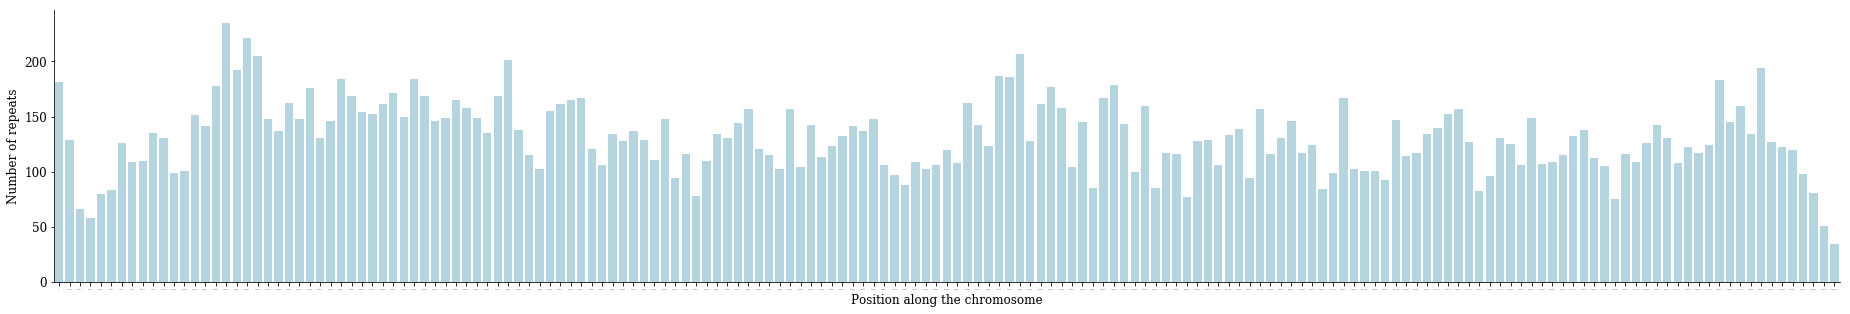

In [24]:
ml.rcParams['figure.figsize'] = (32, 5)
sns.barplot(x=df3["begin"], y=df3["repts"] , color='lightblue')
#plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=1)
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.xlabel("Position along the chromosome")
plt.ylabel("Number of repeats")
plt.show()



## Dataset 1: Variants w/o singletons and doubletons 

First, PCA analysis was preformed for the data with only necessary filtering to retain maximum coverage.
Short summary of filtering:
- Input file from Aurora: `cardui_migrdiv_indv.vcf.gz`
- Maximum missing % of individuals: 0.3
- Minor allele frequency cutoff fixed to 0.006: which correspond to removing singletons only in dataset of 347 individuals 
- Variant depth set to maximum possible: 4 (see justification in Evernote)


### Creating data frames

In [98]:
eigvec = open("/Users/dshipilina/GitHub/AfricanDivide/PCA/vanessa.fullSFS.eigenvec").read()
split_eig = eigvec.split('\n')
eigvec_array=[]
#print(split_file2[2])
for i in split_eig:
    ii=i.split()
    eigvec_array+=[ii]
    
#print(eigvec_array[2])
    
popid = open("/Users/dshipilina/GitHub/AfricanDivide/popmap1.txt").read()
split_popid = popid.split('\n')
#print(txt2)
popID_array=[]
#print(split_file2[2])
for i in split_popid:
    ii=i.split()
    popID_array+=[ii]

df = pd.DataFrame(eigvec_array) # , columns = ["ScaffoldID", "N_BUSCOs","BUSCOs_coverage", ])
#remove extra labels and extra PCs
df =df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
#remove empty row
df = df.drop(labels=[347], axis=0)
#rename columns
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
cols = ["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
#df["PCA1"] = pd.to_numeric(df["PCA1"], downcast="float")
#df["PCA2"] = pd.to_numeric(df["PCA2"], downcast="float")
#df["PCA3"] = pd.to_numeric(df["PCA3"], downcast="float")

#splitting names
#print(df["FullID"])
dftmp=df["FullID"].str.split('_',expand=True)
#print(dftmp)
dftmp.columns=["Location", "SampleID"]
dftmp

#getting population IDs
dftmp2 = pd.DataFrame(popID_array)
dftmp2.columns=["pop","popID"]
dftmp2

#combining table
df = pd.concat([dftmp,dftmp2,df],axis=1)
df = df.drop(labels=[347], axis=0)
df

,Location,SampleID,pop,popID,FullID,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,Ethiopia,14L679,Ethiopia_14L679,SHEA,Ethiopia_14L679,0.000097,-0.008168,-0.008632,0.000123,0.030216,0.014718,0.002400,-0.016154,-0.036828
1,Ethiopia,14L834,Ethiopia_14L834,SHEA,Ethiopia_14L834,-0.002885,-0.003945,0.029606,-0.036448,-0.085937,-0.214022,0.191938,-0.058535,-0.013052
2,Ethiopia,14L847,Ethiopia_14L847,SHEA,Ethiopia_14L847,0.003818,-0.034181,-0.000400,0.001945,0.005760,-0.034160,0.012775,0.050932,0.008138
3,Ethiopia,14L879,Ethiopia_14L879,SHEA,Ethiopia_14L879,0.005725,-0.042547,-0.019146,0.046944,-0.014321,0.004577,0.015292,0.040597,0.071073
4,Ethiopia,14L880,Ethiopia_14L880,SHEA,Ethiopia_14L880,0.010086,-0.003025,-0.013545,0.055810,0.016690,-0.061142,0.078322,0.033540,0.018149
5,Ethiopia,14L881,Ethiopia_14L881,SHEA,Ethiopia_14L881,0.016871,-0.029300,0.000522,0.030783,-0.006152,0.023856,-0.105348,0.039966,-0.020748
6,Ethiopia,14L882,Ethiopia_14L882,SHEA,Ethiopia_14L882,0.020229,-0.016730,-0.000635,0.022065,0.020973,-0.029956,0.060427,-0.030374,0.029982
7,Ethiopia,14L883,Ethiopia_14L883,SHEA,Ethiopia_14L883,0.012222,-0.047360,0.011949,0.060658,0.010854,0.007260,-0.003843,0.002074,-0.021084
8,Ethiopia,14L884,Ethiopia_14L884,SHEA,Ethiopia_14L884,0.010571,-0.023526,-0.010847,0.054778,0.103059,-0.070647,-0.084763,0.022748,0.060486
9,Ethiopia,14L885,Ethiopia_14L885,SHEA,Ethiopia_14L885,0.011358,0.002832,-0.019333,0.034256,-0.036370,0.004291,-0.055821,-0.006273,-0.059392


### Plotting

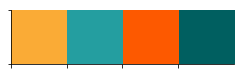

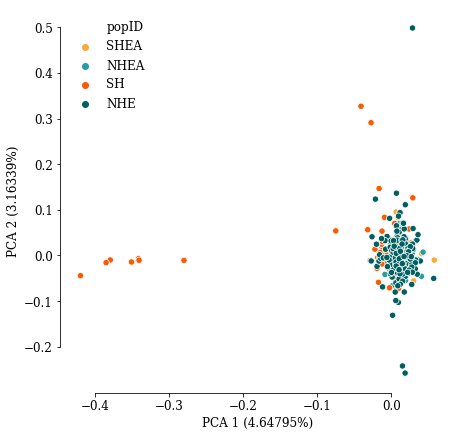

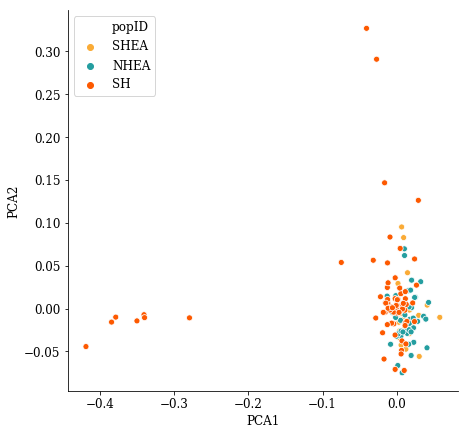

In [99]:
#print(df['loc'])
eigval = open("/Users/dshipilina/GitHub/AfricanDivide/PCA/vanessa.fullSFS.eigenval").read()
split_eigval = eigval.split('\n')
#print(split_eigval[2])


flatui = ["#faab36", "#249ea0", "#fd5900", "#005f60"]
sns.set_palette(flatui)
sns.palplot(sns.color_palette())
plt.show()

#ax = sns.violinplot(x="Contents", y="Flavour", data=rd, color="lol", inner="box")

#df["alpha"] = np.where(df['popID']=="NHE", 1.0, 0.05)
#df

#sns.scatterplot(x=df['PCA1'], y=df['PCA2'],hue=df['popID'],
                    # data=df[df["alpha"] == 0.05], alpha=0.4)
#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'],data=df[df["alpha"] == 1.0], alpha=1.0)

#plt.show()
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine(offset=2, trim=True)
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.legend(frameon=False)
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.png",bbox_inches="tight")
plt.show()


df["alpha"] = np.where(df['popID']=="NHE", 0, 1)
data=df[df["alpha"] == 1]
sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['popID'])
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.png",bbox_inches="tight")
plt.show()

#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'],data=df[df["alpha"] == 1.0], alpha=1.0)
#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
#sns.despine(offset=2, trim=True)
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
#ml.rcParams['figure.figsize'] = (7.0, 7.0)
#plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_all.png",bbox_inches="tight")
#plt.show()





#df

#plt.plot(df['PCA1'], df['PCA2'],'o')#,palette="dark")
#sns.barplot(x=chroname, y=repcov) #, palette="deep") #, ax=ax3)
#plt.xticks(rotation=90)
#plt.axis('off')
#plt.xticks([0,100,200,300],[])
#plt.xticks([0,100,200,300],["0","100","200","300"])
#xtic=np.linspace(-0.075,0.015, num=4)
#plt.xticks(xtic,[])
#plt.xaxis.set_major_locator(plt.MaxNLocator(3))
#plt.axis('equal')
#plt.yticks([0,100,200,300],[])
#plt.yticks()
#plt.xaxis.set_tick_params(width=3)

#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_rare_noLD_4pops_outlremoved.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_rare_noLD_4pops_outlremoved.png",bbox_inches="tight")
#plt.show()
#print(np.linspace(-0.075,0.015, num=4))

## Dataset 1: Variants w/o singletons and doubletons, no LD

We observe distinct outliers in Southern Hemisphere, all belonging to Namibia sampling site. Such pattern, along with excessive grouping of other populations may be an effect of LD in the sample. Here we attempt to correct for LD, removing SNPs, where r^2>0.2 on 50Kb overlapping blocks (performed in plink).

### Creating data frames

In [5]:
eigvec = open("/Users/dshipilina/GitHub/AfricanDivide/vanessa.fullSFS.noLD.eigenvec").read()
split_eig = eigvec.split('\n')
eigvec_array=[]
#print(split_file2[2])
for i in split_eig:
    ii=i.split()
    eigvec_array+=[ii]
    
#print(eigvec_array[2])
    
popid = open("/Users/dshipilina/GitHub/AfricanDivide/popmap1.txt").read()
split_popid = popid.split('\n')
#print(txt2)
popID_array=[]
#print(split_file2[2])
for i in split_popid:
    ii=i.split()
    popID_array+=[ii]

df = pd.DataFrame(eigvec_array) # , columns = ["ScaffoldID", "N_BUSCOs","BUSCOs_coverage", ])
#remove extra labels and extra PCs
df =df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
#remove empty row
df = df.drop(labels=[347], axis=0)
#rename columns
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
cols = ["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
#df["PCA1"] = pd.to_numeric(df["PCA1"], downcast="float")
#df["PCA2"] = pd.to_numeric(df["PCA2"], downcast="float")
#df["PCA3"] = pd.to_numeric(df["PCA3"], downcast="float")

#splitting names
#print(df["FullID"])
dftmp=df["FullID"].str.split('_',expand=True)
#print(dftmp)
dftmp.columns=["Location", "SampleID"]
dftmp

#getting population IDs
dftmp2 = pd.DataFrame(popID_array)
dftmp2.columns=["pop","popID"]
dftmp2

#combining table
df = pd.concat([dftmp,dftmp2,df],axis=1)
df = df.drop(labels=[347], axis=0)
df

,Location,SampleID,pop,popID,FullID,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,Ethiopia,14L679,Ethiopia_14L679,SHEA,Ethiopia_14L679,0.005846,-0.010196,-0.010147,-0.027611,0.013351,-0.017578,0.003775,0.023112,0.007361
1,Ethiopia,14L834,Ethiopia_14L834,SHEA,Ethiopia_14L834,0.004939,-0.000208,0.002408,0.072212,-0.225054,-0.052822,0.094076,-0.072573,0.089144
2,Ethiopia,14L847,Ethiopia_14L847,SHEA,Ethiopia_14L847,0.003944,-0.030819,-0.005309,-0.006589,-0.019863,-0.021010,-0.011668,-0.009252,-0.019089
3,Ethiopia,14L879,Ethiopia_14L879,SHEA,Ethiopia_14L879,-0.006295,-0.025649,-0.044768,0.010433,0.002226,0.028384,0.018244,-0.055023,-0.013553
4,Ethiopia,14L880,Ethiopia_14L880,SHEA,Ethiopia_14L880,-0.009012,-0.003696,-0.074965,-0.017635,-0.071685,-0.037575,0.027057,-0.054784,0.015043
5,Ethiopia,14L881,Ethiopia_14L881,SHEA,Ethiopia_14L881,-0.015221,-0.014269,0.001732,0.003353,0.053557,0.024802,-0.047732,0.070019,-0.042085
6,Ethiopia,14L882,Ethiopia_14L882,SHEA,Ethiopia_14L882,-0.021568,-0.013365,-0.030854,-0.016639,-0.020782,0.008766,0.060172,-0.038753,0.025546
7,Ethiopia,14L883,Ethiopia_14L883,SHEA,Ethiopia_14L883,-0.009668,-0.042449,-0.049795,0.017671,0.022819,-0.031384,0.029530,0.007656,-0.000353
8,Ethiopia,14L884,Ethiopia_14L884,SHEA,Ethiopia_14L884,-0.007123,-0.008352,-0.079365,-0.073373,-0.014060,-0.001127,-0.107306,0.029293,0.038103
9,Ethiopia,14L885,Ethiopia_14L885,SHEA,Ethiopia_14L885,-0.011158,0.004112,-0.014394,0.026939,-0.003889,0.052398,-0.007890,0.094536,-0.012244


### Plotting

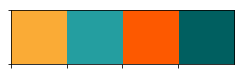

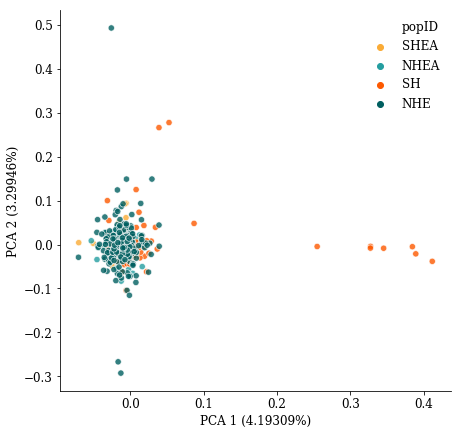

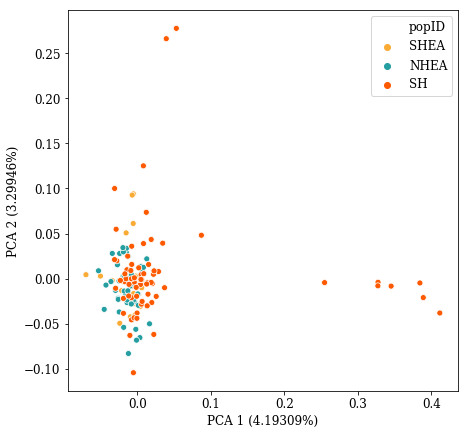

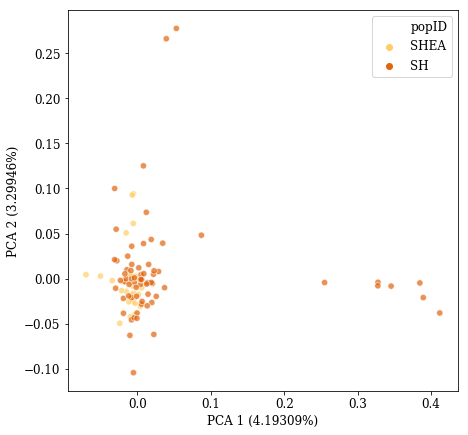

Text(0.5,0,'PCA 2 (3.29946%)')

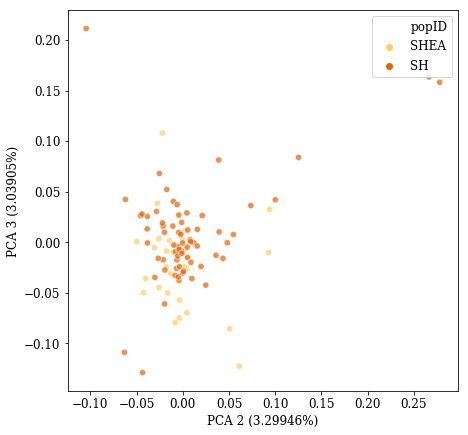

In [43]:
#print(df['loc'])
eigval = open("/Users/dshipilina/GitHub/AfricanDivide/vanessa.fullSFS.noLD.eigenval").read()
split_eigval = eigval.split('\n')
#print(split_eigval[2])


cardui = ["#faab36", "#249ea0", "#fd5900", "#005f60"]
sns.set_palette(cardui)
sns.palplot(sns.color_palette())
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/color_scheme.png",bbox_inches="tight")
plt.show()

#ax = sns.violinplot(x="Contents", y="Flavour", data=rd, color="lol", inner="box")

#df["alpha"] = np.where(df['popID']=="NHE", 1.0, 0.05)
#df

#sns.scatterplot(x=df['PCA1'], y=df['PCA2'],hue=df['popID'],
                    # data=df[df["alpha"] == 0.05], alpha=0.4)
#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'],data=df[df["alpha"] == 1.0], alpha=1.0)

#plt.show()
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40,alpha=.8) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine(offset=0, trim=False)
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.legend(frameon=False)
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_noLD.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_noLD.png",bbox_inches="tight")
plt.show()

df["alpha"] = np.where(df['popID']=="NHE", 0, 1)
data=df[df["alpha"] == 1]
sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['popID'])
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
#sns.despine(offset=0, trim=True)
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_noNHE.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_noNHE.png",bbox_inches="tight")
plt.show()

#df["alpha"] = np.where(dfnor, 0, 1)
data=df.loc[(df["popID"] == "SH") | (df["popID"] == "SHEA")]
sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['popID'], palette="YlOrBr",alpha=.7,s=40)
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
plt.show()
data=df.loc[(df["popID"] == "SH") | (df["popID"] == "SHEA")]
sns.scatterplot(x=data['PCA2'], y=data['PCA3'], hue=data['popID'], palette="YlOrBr",alpha=.7,s=40)
plt.ylabel("PCA 3 ("+ (split_eigval[2])+"%)")
plt.xlabel("PCA 2 ("+split_eigval[1]+"%)")
#sns.scatterplot(x=north['PCA1'], y=north['PCA2'], hue=north['popID'])
#north

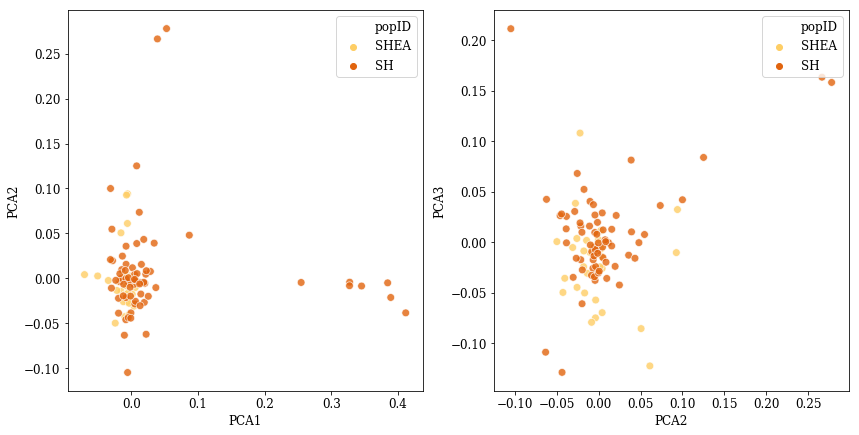

In [56]:
#fig_dims = (6, 6)
ml.rcParams['figure.figsize'] = (14.0, 7.0)
fig, axs = plt.subplots(ncols=2)#,figsize=fig_dims)
sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['popID'], palette="YlOrBr",alpha=.8,s=60, ax=axs[0])
sns.scatterplot(x=data2['PCA2'], y=data2['PCA3'], hue=data2['popID'], palette="YlOrBr",alpha=.8,s=60,ax=axs[1])
#sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_SouthPC123.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_SouthPC123.png",bbox_inches="tight")

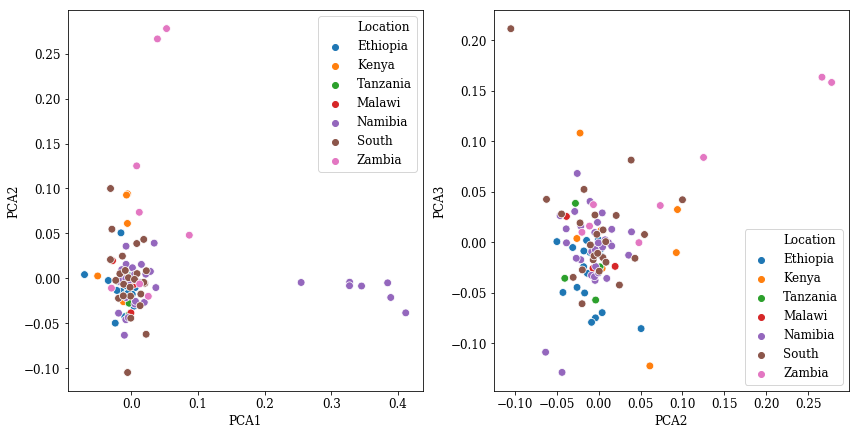

In [73]:
#fig_dims = (6, 6)
#sns.set_palette("muted")
 
ml.rcParams['figure.figsize'] = (14.0, 7.0)
fig, axs = plt.subplots(ncols=2)#,figsize=fig_dims)
sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['Location'],palette="tab10",s=60, ax=axs[0])
sns.scatterplot(x=data2['PCA2'], y=data2['PCA3'], hue=data2['Location'], palette="tab10",s=60,ax=axs[1])
#sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_SouthLocs.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_SouthLocs.png",bbox_inches="tight")

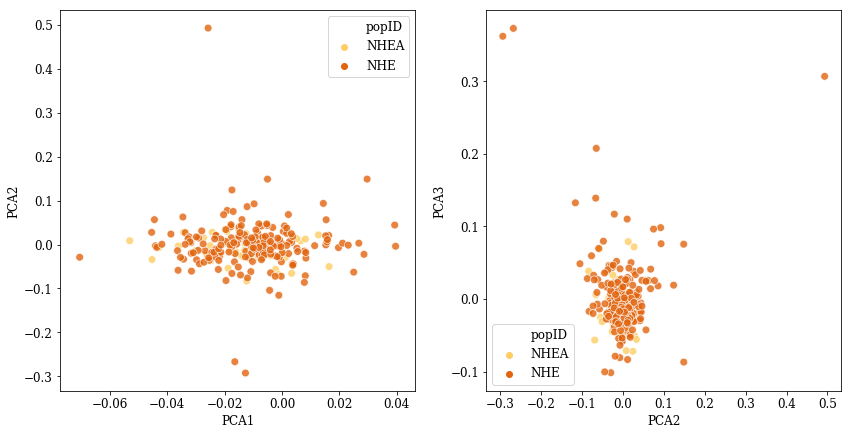

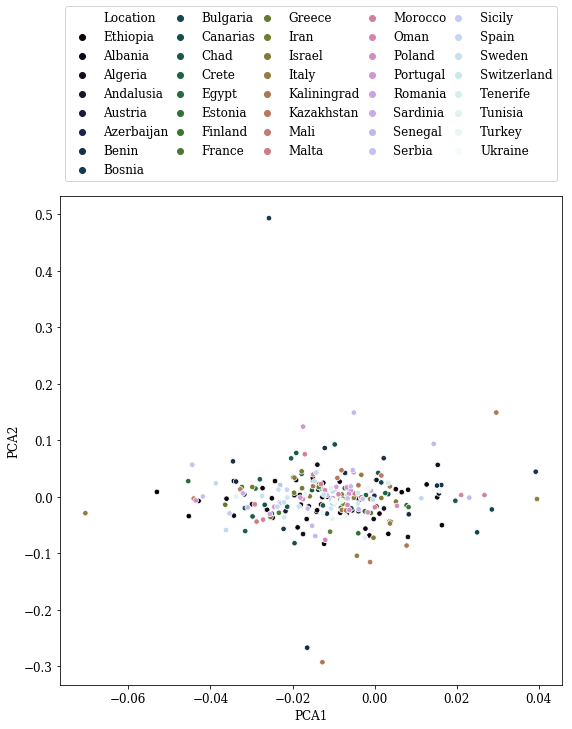

In [102]:
#fig_dims = (6, 6)
data_north=df.loc[(df["popID"] == "NHE") | (df["popID"] == "NHEA")]

ml.rcParams['figure.figsize'] = (14.0, 7.0)
fig, axs = plt.subplots(ncols=2)#,figsize=fig_dims)
sns.scatterplot(x=data_north['PCA1'], y=data_north['PCA2'], hue=data_north['popID'], palette="YlOrBr",alpha=.8,s=60, ax=axs[0])
sns.scatterplot(x=data_north['PCA2'], y=data_north['PCA3'], hue=data_north['popID'], palette="YlOrBr",alpha=.8,s=60,ax=axs[1])
#sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_North.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_North.png",bbox_inches="tight") 
plt.show()
    
ml.rcParams['figure.figsize'] = (9.0, 9.0)
#fig, axs = plt.subplots(ncols=2)#,figsize=fig_dims)
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
         # ncol=5, mode="expand", borderaxespad=0.4)
sns.scatterplot(x=data_north['PCA1'], y=data_north['PCA2'], hue=data_north['Location'],palette="cubehelix",s=30)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=5, mode="expand", borderaxespad=0.4)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, mode="expand", borderaxespad=0.4)
#sns.scatterplot(x=data_north['PCA2'], y=data_north['PCA3'], hue=data_north['Location'], palette="tab10",s=60,ax=axs[1])
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, mode="expand", borderaxespad=0.4)
#sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_NorthLocs.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_NorthLocs.png",bbox_inches="tight")

In [108]:
#data3=df.loc[(df["popID"] == "NHE") | (df["popID"] == "NHEA")]
df.loc[df["PCA2"] >= 0.2]
#174 158 249
df.loc[df["PCA2"] <= -0.15]

,Location,SampleID,pop,popID,FullID,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,alpha
158,Azerbaijan,14M918,Azerbaijan_14M918,NHE,Azerbaijan_14M918,-0.016421,-0.267026,0.372889,-0.080433,-0.220775,0.009525,-0.215330,0.161766,-0.033656,0
249,Kaliningrad,15O460,Kaliningrad_15O460,NHE,Kaliningrad_15O460,-0.012714,-0.292747,0.362053,-0.069919,-0.196652,0.090881,-0.103491,-0.013407,0.040324,0


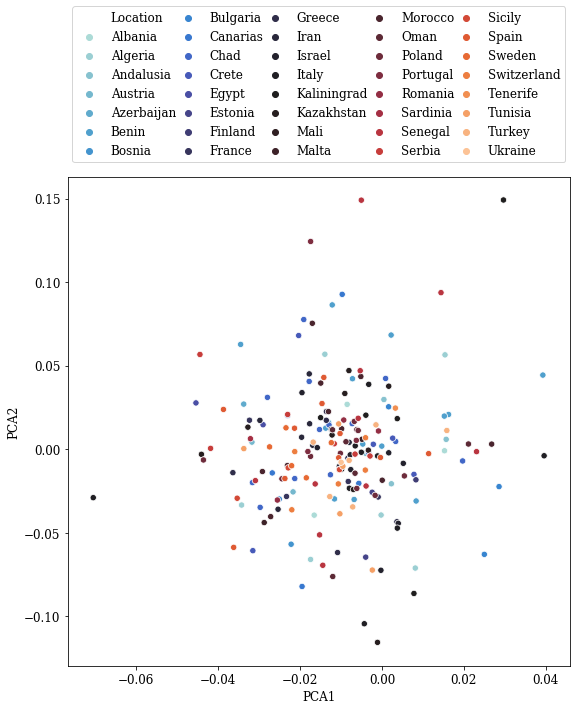

In [119]:
data = df.drop(labels=[174,158,249], axis=0)
data_north=data.loc[(data["popID"] == "NHE")]
data_north

ml.rcParams['figure.figsize'] = (9.0, 9.0)
#fig, axs = plt.subplots(ncols=2)#,figsize=fig_dims)
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
         # ncol=5, mode="expand", borderaxespad=0.4)
sns.scatterplot(x=data_north['PCA1'], y=data_north['PCA2'], hue=data_north['Location'],palette="icefire",s=40)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=5, mode="expand", borderaxespad=0.4)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, mode="expand", borderaxespad=0.4)
#sns.scatterplot(x=data_north['PCA2'], y=data_north['PCA3'], hue=data_north['Location'], palette="tab10",s=60,ax=axs[1])
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, mode="expand", borderaxespad=0.4)
#sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_NorthEzoom.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_fullSFS_NorthEzoom.png",bbox_inches="tight")

## Dataset 2: Rare variants, no LD (Aurora)

Here we briefly check population structure based on rare variants (MAF: 0.001-0.010, MAC: 1-4)

### Creating data frames

In [120]:
eigvec = open("/Users/dshipilina/GitHub/AfricanDivide/PCA/vanessa.noLD.eigenvec").read()
#eigvec = open("/Users/dshipilina/GitHub/AfricanDivide/PCA/vanessa.fullSFS.eigenvec").read()
split_eig = eigvec.split('\n')
eigvec_array=[]
#print(split_file2[2])
for i in split_eig:
    ii=i.split()
    eigvec_array+=[ii]
    
#print(eigvec_array[2])
    
popid = open("/Users/dshipilina/GitHub/AfricanDivide/popmap1.txt").read()
split_popid = popid.split('\n')
#print(txt2)
popID_array=[]
#print(split_file2[2])
for i in split_popid:
    ii=i.split()
    popID_array+=[ii]

df = pd.DataFrame(eigvec_array) # , columns = ["ScaffoldID", "N_BUSCOs","BUSCOs_coverage", ])
#remove extra labels and extra PCs
df =df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
#remove empty row
df = df.drop(labels=[347], axis=0)
#rename columns
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
cols = ["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
#df["PCA1"] = pd.to_numeric(df["PCA1"], downcast="float")
#df["PCA2"] = pd.to_numeric(df["PCA2"], downcast="float")
#df["PCA3"] = pd.to_numeric(df["PCA3"], downcast="float")

#splitting names
#print(df["FullID"])
dftmp=df["FullID"].str.split('_',expand=True)
#print(dftmp)
dftmp.columns=["Location", "SampleID"]
dftmp

#getting population IDs
dftmp2 = pd.DataFrame(popID_array)
dftmp2.columns=["pop","popID"]
dftmp2

#combining table
df = pd.concat([dftmp,dftmp2,df],axis=1)
df = df.drop(labels=[347], axis=0)


,Location,SampleID,pop,popID,FullID,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,Ethiopia,14L679,Ethiopia_14L679,SHEA,Ethiopia_14L679,0.002802,0.005417,-0.004222,0.001314,0.005840,0.006859,-0.010284,0.008576,-0.001835
1,Ethiopia,14L834,Ethiopia_14L834,SHEA,Ethiopia_14L834,0.002761,0.001727,-0.006147,0.007999,0.004541,0.014940,0.011748,0.011324,-0.003060
2,Ethiopia,14L847,Ethiopia_14L847,SHEA,Ethiopia_14L847,0.003473,0.004805,-0.002392,0.011113,-0.004423,0.009877,-0.002200,0.016224,-0.009174
3,Ethiopia,14L879,Ethiopia_14L879,SHEA,Ethiopia_14L879,0.004469,0.004976,-0.000792,-0.008095,-0.014988,0.016938,-0.004317,0.014393,0.001216
4,Ethiopia,14L880,Ethiopia_14L880,SHEA,Ethiopia_14L880,0.004953,0.000618,-0.002443,-0.006029,0.003743,0.008389,0.003923,0.001034,-0.011354
5,Ethiopia,14L881,Ethiopia_14L881,SHEA,Ethiopia_14L881,0.001845,0.005825,0.002754,0.023064,0.009874,-0.020175,-0.033340,0.019036,0.015128
6,Ethiopia,14L882,Ethiopia_14L882,SHEA,Ethiopia_14L882,0.004616,0.006254,-0.008101,-0.000949,0.000912,0.014820,-0.001974,0.009565,-0.000436
7,Ethiopia,14L883,Ethiopia_14L883,SHEA,Ethiopia_14L883,0.001977,0.009308,0.002357,0.012593,0.048538,-0.001260,-0.056441,-0.024183,0.009759
8,Ethiopia,14L884,Ethiopia_14L884,SHEA,Ethiopia_14L884,0.006280,-0.030380,-0.011089,0.026257,-0.015191,0.024882,0.037571,-0.019018,0.015673
9,Ethiopia,14L885,Ethiopia_14L885,SHEA,Ethiopia_14L885,0.002480,0.004672,-0.004572,-0.003449,0.006982,-0.000357,0.001561,0.013991,-0.006121


### Plotting

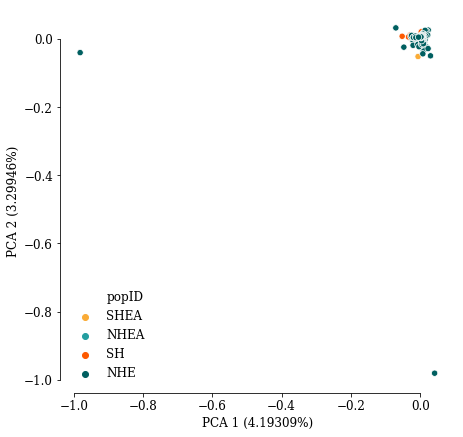

In [123]:
flatui = ["#faab36", "#249ea0", "#fd5900", "#005f60"]
sns.set_palette(flatui)
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine(offset=2, trim=True)
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (7.0, 7.0)
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.legend(frameon=False)
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_rare_all.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_rare_all.png",bbox_inches="tight")
plt.show()

In [4]:
eigvec = open("/Users/dshipilina/GitHub/AfricanDivide/PCA/vanessa.noLD.eigenvec").read()
split_eig = eigvec.split('\n')
eigvec_array=[]
#print(split_file2[2])
for i in split_eig:
    ii=i.split()
    eigvec_array+=[ii]
    
#print(eigvec_array[2])
    
popid = open("/Users/dshipilina/GitHub/AfricanDivide/popmap1.txt").read()
split_popid = popid.split('\n')
#print(txt2)
popID_array=[]
#print(split_file2[2])
for i in split_popid:
    ii=i.split()
    popID_array+=[ii]

df = pd.DataFrame(eigvec_array) # , columns = ["ScaffoldID", "N_BUSCOs","BUSCOs_coverage", ])
#remove extra labels and extra PCs
df =df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
#remove empty row
df = df.drop(labels=[347], axis=0)
#rename columns
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
df["PCA1"] = pd.to_numeric(df["PCA1"], downcast="float")
df["PCA2"] = pd.to_numeric(df["PCA2"], downcast="float")
df["PCA3"] = pd.to_numeric(df["PCA3"], downcast="float")

#splitting names
#print(df["FullID"])
dftmp=df["FullID"].str.split('_',expand=True)
#print(dftmp)
dftmp.columns=["Location", "SampleID"]
dftmp

#getting population IDs
dftmp2 = pd.DataFrame(popID_array)
dftmp2.columns=["pop","popID"]
#dftmp2 =dftmp2.drop(dftmp2.columns[0], axis=1)
#dftmp2["hem"] = dftmp2['popID'] 
#dftmp2=dftmp2["hem"].str.split('H',expand=True)
#dftmp2 =dftmp2.drop(dftmp2.columns[1], axis=1)
#dftmp2.columns=["hem"]
dftmp2

#combining table
df = pd.concat([dftmp,dftmp2,df],axis=1)
#remove outliers
#df = df.drop(labels=[347,241,148], axis=0)
df[0:50]

,Location,SampleID,pop,popID,FullID,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,Ethiopia,14L679,Ethiopia_14L679,SHEA,Ethiopia_14L679,0.002802,0.005417,-0.004222,0.00131391,0.00583967,0.00685936,-0.0102844,0.00857632,-0.00183528
1,Ethiopia,14L834,Ethiopia_14L834,SHEA,Ethiopia_14L834,0.002761,0.001727,-0.006147,0.00799899,0.0045411,0.0149395,0.0117477,0.011324,-0.00305958
2,Ethiopia,14L847,Ethiopia_14L847,SHEA,Ethiopia_14L847,0.003473,0.004805,-0.002392,0.0111125,-0.00442269,0.00987714,-0.00219994,0.0162244,-0.0091744
3,Ethiopia,14L879,Ethiopia_14L879,SHEA,Ethiopia_14L879,0.004469,0.004976,-0.000792,-0.00809506,-0.0149882,0.0169377,-0.00431722,0.0143929,0.00121647
4,Ethiopia,14L880,Ethiopia_14L880,SHEA,Ethiopia_14L880,0.004953,0.000618,-0.002443,-0.00602892,0.00374283,0.00838945,0.00392339,0.00103417,-0.0113536
5,Ethiopia,14L881,Ethiopia_14L881,SHEA,Ethiopia_14L881,0.001845,0.005825,0.002754,0.0230639,0.00987362,-0.0201748,-0.0333398,0.0190355,0.0151279
6,Ethiopia,14L882,Ethiopia_14L882,SHEA,Ethiopia_14L882,0.004616,0.006254,-0.008101,-0.00094936,0.000911696,0.0148198,-0.00197365,0.00956534,-0.000435603
7,Ethiopia,14L883,Ethiopia_14L883,SHEA,Ethiopia_14L883,0.001977,0.009308,0.002357,0.0125927,0.048538,-0.00125992,-0.0564411,-0.0241833,0.00975902
8,Ethiopia,14L884,Ethiopia_14L884,SHEA,Ethiopia_14L884,0.006280,-0.030380,-0.011089,0.0262571,-0.0151913,0.0248822,0.0375713,-0.0190177,0.0156729
9,Ethiopia,14L885,Ethiopia_14L885,SHEA,Ethiopia_14L885,0.002480,0.004672,-0.004572,-0.00344859,0.00698174,-0.000356601,0.00156139,0.0139908,-0.00612109


1.96112


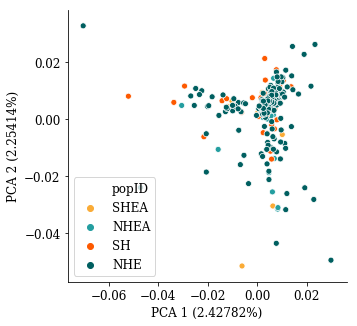

In [132]:
#print(df['loc'])
#df = df.drop(labels=[241,148], axis=0)
eigval = open("/Users/dshipilina/GitHub/AfricanDivide/PCA/vanessa.noLD.eigenval").read()
split_eigval = eigval.split('\n')
print(split_eigval[2])

sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'])#,palette="dark")
#plt.plot(df['PCA1'], df['PCA2'],'o')#,palette="dark")
#sns.barplot(x=chroname, y=repcov) #, palette="deep") #, ax=ax3)
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
#plt.xticks(rotation=90)
#plt.axis('off')
#plt.xticks([0,100,200,300],[])
#plt.xticks([0,100,200,300],["0","100","200","300"])
#xtic=np.linspace(-0.075,0.015, num=4)
#plt.xticks(xtic,[])
#plt.xaxis.set_major_locator(plt.MaxNLocator(3))
#plt.axis('equal')
#plt.yticks([0,100,200,300],[])
#plt.yticks()
#plt.xaxis.set_tick_params(width=3)
ml.rcParams['figure.figsize'] = (5.0, 5.0)
#plt.legend(loc='center left') #mode="expand") #loc='center left', bbox_to_anchor=(1, 0.5),
           #ncol=2, mode="expand", borderaxespad=0.4)
plt.legend(loc='lower left')#, bbox_to_anchor=(0.5, 0., 0.5, 0.5))
#plt.legend(bbox_to_anchor=(0., 1.0, 1., .102), loc='lower left') #,
          #ncol=2, mode="expand", borderaxespad=0.4)
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
#plt.legend([])
#plt.legend('',frameon=False)
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_rare_noLD_outlremoved.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_rare_noLD_outlremoved.png",bbox_inches="tight")
#plt.show()
#print(np.linspace(-0.075,0.015, num=4))

In [145]:
#Check outliers

#df['PCA1'].max()
print(df['PCA1'].idxmin(axis = 0))
print(df['PCA2'].idxmin(axis = 0))

241
148


## Dataset 3

In [6]:
eigvec = open("/Users/dshipilina/GitHub/AfricanDivide/vanessa.noMAF.noLD.eigenvec").read()
split_eig = eigvec.split('\n')
eigvec_array=[]
#print(split_file2[2])
for i in split_eig:
    ii=i.split()
    eigvec_array+=[ii]
    
#print(eigvec_array[2])
    
popid = open("/Users/dshipilina/GitHub/AfricanDivide/popmap1.txt").read()
split_popid = popid.split('\n')
#print(txt2)
popID_array=[]
#print(split_file2[2])
for i in split_popid:
    ii=i.split()
    popID_array+=[ii]

df = pd.DataFrame(eigvec_array) # , columns = ["ScaffoldID", "N_BUSCOs","BUSCOs_coverage", ])
#remove extra labels and extra PCs
df =df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
#remove empty row
df = df.drop(labels=[347], axis=0)
#rename columns
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
cols = ["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
#df["PCA1"] = pd.to_numeric(df["PCA1"], downcast="float")
#df["PCA2"] = pd.to_numeric(df["PCA2"], downcast="float")
#df["PCA3"] = pd.to_numeric(df["PCA3"], downcast="float")

#splitting names
#print(df["FullID"])
dftmp=df["FullID"].str.split('_',expand=True)
#print(dftmp)
dftmp.columns=["Location", "SampleID"]
dftmp

#getting population IDs
dftmp2 = pd.DataFrame(popID_array)
dftmp2.columns=["pop","popID"]
dftmp2

#combining table
df = pd.concat([dftmp,dftmp2,df],axis=1)
df = df.drop(labels=[347], axis=0)
df

,Location,SampleID,pop,popID,FullID,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,Ethiopia,14L679,Ethiopia_14L679,SHEA,Ethiopia_14L679,0.004174,-0.021558,0.041394,0.026197,-0.003011,0.014104,0.021737,0.048419,0.030903
1,Ethiopia,14L834,Ethiopia_14L834,SHEA,Ethiopia_14L834,0.014325,0.007990,-0.009897,-0.018930,0.072188,0.020528,0.081598,-0.044336,0.008712
2,Ethiopia,14L847,Ethiopia_14L847,SHEA,Ethiopia_14L847,0.015374,-0.002143,0.037596,0.022956,0.037783,0.025437,-0.005848,0.012683,-0.028088
3,Ethiopia,14L879,Ethiopia_14L879,SHEA,Ethiopia_14L879,0.005294,0.001047,-0.016138,-0.007664,0.048390,0.018202,-0.055755,-0.001855,-0.021302
4,Ethiopia,14L880,Ethiopia_14L880,SHEA,Ethiopia_14L880,-0.004514,-0.041366,-0.028656,-0.088044,0.066932,0.013013,-0.061201,-0.006533,0.025859
5,Ethiopia,14L881,Ethiopia_14L881,SHEA,Ethiopia_14L881,-0.022096,-0.001534,0.030158,0.021879,-0.016596,-0.003050,-0.007015,0.014103,0.005532
6,Ethiopia,14L882,Ethiopia_14L882,SHEA,Ethiopia_14L882,-0.032298,0.019302,-0.001643,-0.042877,0.021668,-0.027412,0.010616,0.038573,-0.011102
7,Ethiopia,14L883,Ethiopia_14L883,SHEA,Ethiopia_14L883,-0.022608,-0.017115,0.029765,-0.017725,0.044425,0.014075,-0.015173,0.042587,-0.013373
8,Ethiopia,14L884,Ethiopia_14L884,SHEA,Ethiopia_14L884,-0.007699,-0.066929,0.045378,-0.017565,0.029074,0.133797,0.052516,-0.017617,0.051133
9,Ethiopia,14L885,Ethiopia_14L885,SHEA,Ethiopia_14L885,-0.021504,0.006249,-0.043836,0.026296,-0.044476,0.036902,0.012547,0.028114,-0.015742


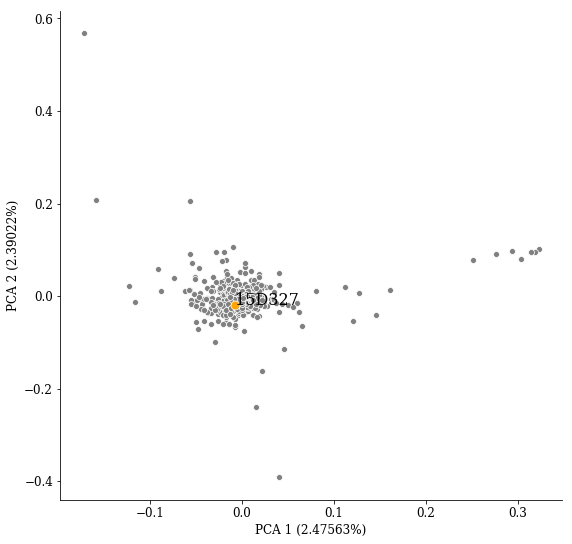

In [25]:
#print(df['loc'])
eigval = open("/Users/dshipilina/GitHub/AfricanDivide/vanessa.noMAF.noLD.eigenval").read()
split_eigval = eigval.split('\n')
#print(split_eigval[2])


cardui = ["#faab36", "#249ea0", "#fd5900", "#005f60"]
sns.set_palette(cardui)
#sns.palplot(sns.color_palette())
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/color_scheme.png",bbox_inches="tight")
plt.show()

#ax = sns.violinplot(x="Contents", y="Flavour", data=rd, color="lol", inner="box")

#df["alpha"] = np.where(df['popID']=="NHE", 1.0, 0.05)
#df

#sns.scatterplot(x=df['PCA1'], y=df['PCA2'],hue=df['popID'],
                    # data=df[df["alpha"] == 0.05], alpha=0.4)
#sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'],data=df[df["alpha"] == 1.0], alpha=1.0)

#plt.show()
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], color='grey')
sns.scatterplot(xout, yout, color='orange', s=80)#, hue=df['popID'], s=20,alpha=.8) #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
sns.despine(offset=0, trim=False)
plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
ml.rcParams['figure.figsize'] = (9.0, 9.0)
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.legend(frameon=False)
#plt.text(df['PCA1'],df['PCA2'],"TOT", color='red')
plt.text(xout,yout,"15D327",size=16)#, color='red')
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_noMAF_noLD.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/PCA/PCA_noMAF_noLD.png",bbox_inches="tight")
plt.show()

In [15]:
#dot labler
xout=df['PCA1'][df["FullID"]=='Namibia_15D327']
yout=df['PCA2'][df["FullID"]=='Namibia_15D327']

# ADMIXTURE

In [3]:
new = open("/Users/dshipilina/GitHub/AfricanDivide/ADMIXTURE/cardui_migrdiv_indv_rarev_md25.2.Q").read()
split_ = new.split('\n')
print(split_[2])
eigve_array=[]
#print(split_file2[2])
for i in split_:
    ii=i.split()
    eigve_array+=[ii]

df3=pd.DataFrame(eigve_array)
df3.columns=['pop1','pop2']
df3

df4= pd.concat([df3,df],axis=1)
#print(df4)
df4["pop2"] = pd.to_numeric(df4["pop2"], downcast="float")
df4["pop1"] = pd.to_numeric(df4["pop1"], downcast="float")
#df4.sort_values(by=["pop2"], inplace=True)
df4 = df4.sort_values(["popID", "pop1","Location"], ascending = (False, True,True))
#print(df)
df4 = df4.drop(labels=[347], axis=0)
df4[100:150]

0.000010 0.999990


NameError: name 'df' is not defined

In [ ]:
ml.rcParams['figure.figsize'] = (32, 5)
#index = range(len(df4["FullID"]))
plt.bar(df4["FullID"],height=1)#,width=0.98)
#plt.bar(df4["FullID"],df4["pop1"])#,width=0.98)
#index = range(len(df4["FullID"]))
#plt.xticks(index, df4["FullID"])  # set the X ticks and labels
#sns.barplot(x=df4["FullID"][0:50], y=np.ones(50), dodge=False) #,color='darkblue')#,edgecolor="darkblue")
sns.barplot(x=df4["FullID"], y=df4["pop1"], color='lightblue')
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=7)
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.xlabel("SHEA  SH   NHEA  NHE")
plt.ylabel("inferred allele frequences")

# show the graph
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/admixtureK2_v4.pdf",bbox_inches="tight")
#plt.show

In [ ]:
sns.barplot(x=df3[""], y=df4["pop1"], color='lightblue')

In [ ]:
# new = open("/Users/dshipilina/GitHub/AfricanDivide/cardui_migrdiv_indv_rarev_md25.2.Q").read()
# split_ = new.split('\n')
# print(split_[2])
# eigve_array=[]
# #print(split_file2[2])
# for i in split_:
#     ii=i.split()
#     eigve_array+=[ii]

# df3=pd.DataFrame(eigve_array)
# df3.columns=['pop1','pop2']
# df3

# df4= pd.concat([df3,df],axis=1)
# #print(df4)
# #df4["pop2"] = pd.to_numeric(df4["pop2"], downcast="float")
# df4["pop1"] = pd.to_numeric(df4["pop1"], downcast="float")
# #df4.sort_values(by=["pop2"], inplace=True)
# df4.sort_values(["pop", "popID"])#, ascending = (False, True))
# #print(df)
# #df4 = df4.drop(labels=[347], axis=0)
# df4[167:190]

In [ ]:
# ml.rcParams['figure.figsize'] = (30, 5)
# #index = range(len(df4["FullID"]))
# plt.bar(df5["FullID"],height=1)#,width=0.98)
# #plt.bar(df4["FullID"],df4["pop1"])#,width=0.98)
# #index = range(len(df4["FullID"]))
# #plt.xticks(index, df4["FullID"])  # set the X ticks and labels
# #sns.barplot(x=df4["FullID"][0:50], y=np.ones(50), dodge=False) #,color='darkblue')#,edgecolor="darkblue")
# sns.barplot(x=df5["FullID"], y=df5["pop1"], color='lightblue')
# plt.xticks(rotation=90)
# plt.tick_params(axis='x', labelsize=8)
# plt.rcParams['axes.spines.left'] = False
# #plt.rcParams['axes.spines.right'] = False
# plt.rcParams['axes.spines.top'] = False
# #plt.rcParams['axes.spines.bottom'] = False
# plt.xlabel("")
# plt.ylabel("inferred allele frequences")
# index = range(len(df5["FullID"]))
# plt.xticks(index, df5["FullID"])

# # show the graph
# plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/admixtureK2_v5.pdf",bbox_inches="tight")
# plt.show

In [ ]:
# new = open("/Users/dshipilina/GitHub/AfricanDivide/cardui_migrdiv_indv_rarev_md25.2.Q").read()
# split_ = new.split('\n')
# print(split_[2])
# eigve_array=[]
# #print(split_file2[2])
# for i in split_:
#     ii=i.split()
#     eigve_array+=[ii]

# df3=pd.DataFrame(eigve_array)
# df3.columns=['pop1','pop2']
# df3

# df4= pd.concat([df3,df],axis=1)
# print(df4)
# df4["pop2"] = pd.to_numeric(df4["pop2"], downcast="float")
# df4["pop1"] = pd.to_numeric(df4["pop1"], downcast="float")
# df4.sort_values(by=["pop2"], inplace=True)
# print(df4)
# #sns.axes_style("whitegrid")
# ml.rcParams['figure.figsize'] = (30, 5)
# plt.bar(df4["FullID"],height=1)#,width=0.98)
# plt.bar(df4["FullID"],df4["pop1"])#,width=0.98)
# index = range(len(df4["FullID"]))
# plt.xticks(index, df4["FullID"])  # set the X ticks and labels
# #bar1 = sns.barplot(x=df4["FullID"][0:50], y=np.ones(50), dodge=False) #,color='darkblue')#,edgecolor="darkblue")
# #bar2 = sns.barplot(x=df4["FullID"], y=df4["pop1"], color='lightblue',edgecolor="none")
# plt.xticks(rotation=90)
# plt.tick_params(axis='x', labelsize=6)
# #plt.rcParams['axes.spines.left'] = False
# plt.rcParams['axes.spines.right'] = False
# #plt.rcParams['axes.spines.top'] = False
# plt.rcParams['axes.spines.bottom'] = False

# #plt.show()  

# #plt.bar(df4["FullID"],height=1)

# #print(df4["pop1"])
# #tips = sns.load_dataset("tips")
# #tips
                         

# # bar chart 2 -> bottom bars (group of 'smoker=Yes')
# #bar2 = sns.barplot(x="day", y="total_bill", data=smoker, color='lightblue')

# # add legend
# #top_bar = mpatches.Patch(color='darkblue', label='smoker = No')
# #bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
# #plt.legend(handles=[top_bar, bottom_bar])

# # show the graph
# #plt.show()
# plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/admixtureK2_3.pdf",bbox_inches="tight")